In [1]:
 %matplotlib notebook
import pandas as pd
 import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [2]:
output_data = pd.read_csv('Output Data Clean.csv')
output_data.head()
output_data['Population Density'] = output_data['Population']/output_data['Land Area']
output_data['Total Crime'] = output_data['Violent Crime'] + output_data['Property Crime']
output_data['Citizens per Officer'] = output_data['Population']/output_data['Total Officers']
output_data['Officer per Square Mile'] = output_data['Total Officers'] / output_data['Land Area']
output_data['Total Crime Rate'] = output_data['Total Crime'] / output_data['Population'] * 100000
output_data['Violent Crime Rate'] = output_data['Violent Crime'] / output_data['Population'] * 100000
output_data['Property Crime Rate'] = output_data['Property Crime'] / output_data['Population'] * 100000
output_data.sort_values(by='Violent Crime', ascending=False).head()
output_data = output_data.drop([21])
output_data = output_data.drop([36])
output_data.head()
output_data.sort_values(by='Total Crime Rate', ascending=False).head()

,County,County Type,Violent Crime,Murder And Nonnegligent Manslaughter,Forcible Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny- Theft,...,Total Officers,Population,Land Area,Population Density,Total Crime,Citizens per Officer,Officer per Square Mile,Total Crime Rate,Violent Crime Rate,Property Crime Rate
22,San Joaquin,Metropolitan,5427,63,161,1826,3377,27015,7434,16728,...,883,685306,1391,492.671459,32442,776.110985,0.634795,4733.943669,791.909016,3942.034653
4,Fresno,Metropolitan,4904,63,181,1358,3302,38442,8982,22680,...,1793,930450,5957,156.194393,43346,518.934746,0.300990,4658.606051,527.056800,4131.549250
31,Stanislaus,Metropolitan,2669,29,134,767,1739,20075,5386,11687,...,801,514453,1494,344.346051,22744,642.263421,0.536145,4421.006389,518.803467,3902.202922
6,Kern,Metropolitan,4875,74,163,1221,3417,30156,9420,15747,...,1345,839631,8131,103.262944,35031,624.260967,0.165416,4172.189926,580.612198,3591.577729
17,Sacramento,Metropolitan,8501,82,387,3093,4939,46773,12720,28605,...,2232,1418788,964,1471.771784,55274,635.657706,2.315353,3895.860410,599.173379,3296.687031


In [3]:
property_crime = output_data.iloc[:,20]

In [4]:
total_officer = output_data.iloc[:, 11]
to_slope, to_int, to_r, to_p, to_std_err = stats.linregress(
   property_crime, total_officer) 
to_fit = to_slope * property_crime + to_int

In [5]:
per_citizen = output_data.iloc[:, 16]
pc_slope, pc_int, pc_r, pc_p, pc_std_err = stats.linregress(
   property_crime, per_citizen) 
pc_fit = pc_slope * property_crime + pc_int

In [6]:
square_mile = output_data.iloc[:, 17]
sm_slope, sm_int, sm_r, sm_p, sm_std_err = stats.linregress(
   property_crime, square_mile) 
sm_fit = sm_slope * property_crime + sm_int

<IPython.core.display.Javascript object>


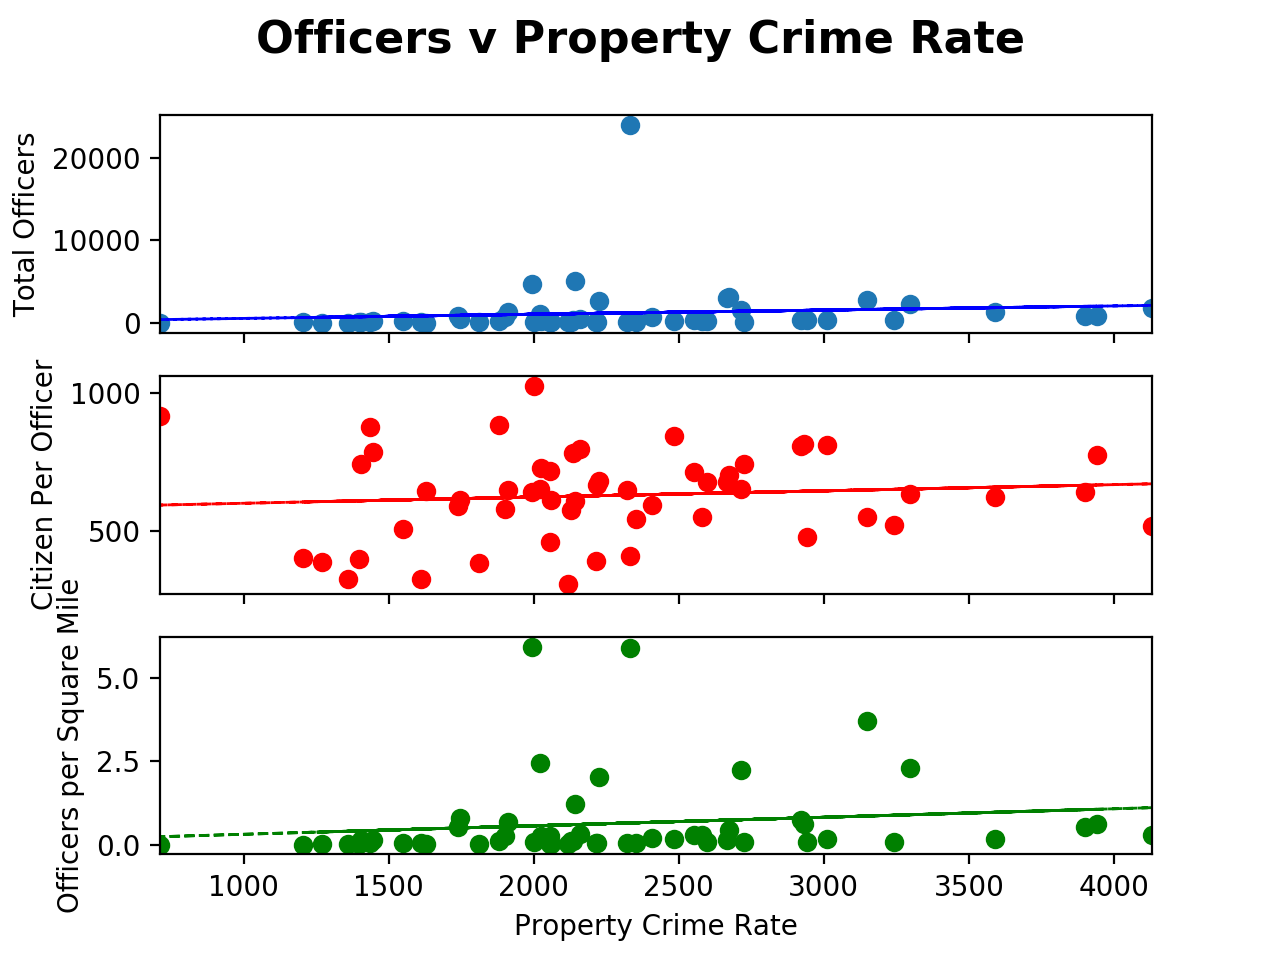

Text(0.5, 0, 'Property Crime Rate')

In [7]:
 # Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Officers v Property Crime Rate", fontsize=16, fontweight="bold")

ax1.set_xlim(min(property_crime), max(property_crime))
ax1.plot(property_crime, total_officer, linewidth=0, marker="o")
ax1.plot(property_crime, to_fit, "b--", linewidth=1)
ax1.set_ylabel("Total Officers")

ax2.plot(property_crime,per_citizen , linewidth=0, marker="o", color="r")
ax2.plot(property_crime, pc_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizen Per Officer")

ax3.plot(property_crime,square_mile , linewidth=0, marker="o", color="g")
ax3.plot(property_crime, sm_fit, "g--", linewidth=1)
ax3.set_ylabel("Officers per Square Mile")
ax3.set_xlabel("Property Crime Rate")

In [8]:
plt.savefig("../Images/officer v property crime.png")